In [64]:
from pymongo import MongoClient
import pprint

from selenium import webdriver
from time import sleep

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup

import json
import time
import copy
import pprint

In [65]:
# driver = webdriver.Chrome()
# driver.get('https://www.baseball-reference.com/teams/tgl.cgi?team=HOU&t=b&year=2017')
# html = driver.page_source
url = 'https://www.baseball-reference.com/teams/tgl.cgi?team=HOU&t=b&year=2017'

In [66]:
def gamelog(url):  
    r = requests.get(url)
    r.status_code
    soup = BeautifulSoup(r.text, 'html.parser')
    tables = soup.find_all('table')
    indices = tables[0].find_all('th')
    rows = tables[0].find_all('tr')
    indices, rows
    columns = {}
    for index in indices[1:32]:
        columns[index.text] = None
    d = {}
    for row in rows:
        d[row.text] = None
    all_data = []
    keys = list(columns.keys())
    for i,row in enumerate(rows):
        if i > 0:
            new_row = copy.copy(columns)
            entries = row.find_all('td')
            for j,entry in enumerate(entries):
                new_row[keys[j]]= entry.text
            all_data.append(new_row)
    return pd.DataFrame.from_records(all_data) 

In [67]:
url = 'https://www.baseball-reference.com/teams/tgl.cgi?team=HOU&t=b&year=2017'

In [85]:
astros2017 = gamelog(url)

In [86]:
def boolhome(df):
    df.rename(columns={"":"Home"}, inplace=True)
    df.replace({"Home":{"@": True, "": False}}, inplace=True)
    return df

In [87]:
astros2017 = boolhome(astros2017)

In [88]:
astros2017.dropna(inplace=True)

0      .241
1      .259
2      .277
3      .277
4      .276
       ... 
162    .345
163    .346
164    .346
165    .346
166    .346
Name: OBP, Length: 162, dtype: object

TypeError: 'value' must be an instance of str or bytes, not a NoneType

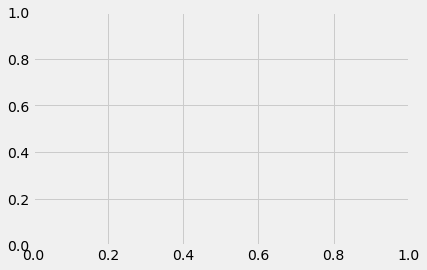

In [52]:
obp = astros2017["OBP"]

fix, ax = plt.subplots()

x = np.linspace(0,162)
ax.plot(astros2017.OBP)

In [37]:
obp

0      .241
1      .259
2      .277
3      .277
4      .276
       ... 
162    .345
163    .346
164    .346
165    .346
166    .346
Name: OBP, Length: 167, dtype: object

In [ ]:
filtered_dict = {}
for _ in all_data:
    for k, v in _.items():
        if _[k] != None:
            filtered_dict[k] = v
    filtered_dict

In [ ]:
len(filtered_dict)

In [ ]:
all_data
for dic in range(20):
    all_data[dic]['Rk'] = (dic+1)
df = pd.DataFrame(all_data)
dlst = list(range(17,38))
df.drop(df.columns[dlst], axis = 1, inplace = True) 
df 

In [223]:
filtered_dict = {}
for k, v in all_data.items():
    if all_data[k] != None:
        filtered_dict[k] = v
filtered_dict

AttributeError: 'list' object has no attribute 'items'